# Lab 4 - Validation & Experimentation

**Due: November 7th at 11:59pm**

## Learning Goals:

The goal of this lab is to practice using good experimental design and methodology to train and test classifiers, as well as tune hyperparameters.  You will write some simple code to try doing this yourself, and you will also use the tools built into scikit-learn, numpy, and scipy-stats.

As with any programming assignment, you'll also be practicing and improving your general CS skills, like problem decomposition, algorithmic thinking, implementation and testing, language syntax, etc.. Here are some of the specific things you should learn while completing this assignment:

   * How to load and use python libraries to train and evaluate ML models in a more rigorous fashion (i.e. going beyond a single train/test split)
   * The impact of a random seed value, and how to mitigate this impact
   * How to measure performance in different ways (beyond just accuracy)
   * How to use your understanding of a data set to figure out what performance measures are appropriate
   * How to work independently to make choices about testing and applying machine learning methods
   * Utilize held-aside tuning sets to choose hyperparameters and balance bias/variance
   * Compare methods on several data sets using $k$-fold cross validation
   * Analyze experiments using several methodologies, including statistical tests and validation curves
   * Learn to read and use the scikit-learn API Reference and User's Guide


This lab is intended to be done with a partner (i.e. teams of two); partners will be assigned based on your response to the partner preference survey.

You'll have approximately one week to complete this lab, it should be shorter and easier than some of the other ones.

**NOTE: this lab comes with two extra notebook files that contain examples; use them for reference.  This notebook is the only one that needs to be modified for the assignment**

In [52]:
# CPSC 66 - Machine Learning
# Lab 4
# Scaffolding by Prof. Ben Mitchell & Ameet Soni
# Assignment completed by: Nina Zhuo
# Resources used: 
#   <List any resources you used beyond the ones posted on Blackboard>
#   <This can include books, websites, other students, etc.>

In [53]:
# import math and numpy first
import math
import numpy as np

# import scipy for stats package
import scipy

# import pandas
import pandas as pd

# import some data and classifiers to play with; you may want to add more
from sklearn import datasets
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.neighbors import NearestNeighbors

# import some validation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import SGDClassifier

# Part 1: Multiple classifiers using SciKit Learn

### Load some data

SciKit Learn comes with a number of "built-in" datasets beyond the Iris dataset we've been using (see https://scikit-learn.org/stable/datasets/index.html for a full list).  For this assignment, we will load several datasets, and compare the performance of several classifiers on each of them.

First we'll load the iris dataset again, since it's small and easy to work with.  Feel free to try replacing this with a different data set to see what happens, though I recommend getting things working first with this one (since it's small enough that everything runs fast).

In [54]:
#load the iris dataset and split it into train and test sets
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=2)

## Create a Nearest Neighbor classifier
Create a nearest neighbor classifier using SKLearn just like we did in Lab 1; here, we will use it as a baseline for comparing other classifiers.  Be sure to train it and then evaluate its performance on the testing data (again, you should be able to use code from the previous assignment with little or no modification to do this).  Use an n_neighbors value of 1.  This should give you the same accuracy as you got in the first assignment.

Once you've got it working, try changing the `random_state` value in the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to 1 and re-running your nearest-neighbor classifier.  Try it again with a value of 2.  Write down each of the accuracies below; the first one has been done for you.

In [55]:
# create and train nearest neighbor classifier
knn = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=1)
knn.fit(X_train, y_train)

# test performance
score = knn.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9666666666666667


**Question 1: accuracy of nearest neighbor for different random seed values**

seed=0, accuracy = 0.9166666666666666

seed=1, accuracy = 0.9666666666666667

seed=2, accuracy = 0.9666666666666667

## Create a Decision Tree

Create a decision tree, using [`tree.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) as your classifier.  Train and test as before.

In [56]:
# create and train dt classifier
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

# test performance
y_predicted = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy: ", score)

Accuracy:  0.9333333333333333


**Question 2: accuracy of decision tree for different random seed values**

seed=0, accuracy = 0.95

seed=1, accuracy = 0.9666666666666667

seed=2, accuracy = 0.9333333333333333

## Create a Logistic Regression classifier
Create a logistic regression classifier using  `SGDClassifier` like we did in the Logistic Regression lab (you can use the sklearn implementation, you don't need to import and use your own implementation of LR)

In [57]:
# create and train logistic regression classifier
sgd = SGDClassifier(loss='log_loss', max_iter=100,shuffle=False, tol=None, \
                    penalty='none', learning_rate='constant', eta0 = 0.1)
sgd.fit(X_train, y_train)

# test performance
y_predict = sgd.predict(X_test)
score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: ", score)

Accuracy:  0.8333333333333334


**Question 3: accuracy of Logistic Regression for different random seed values**

seed=0, accuracy = 0.85

seed=1, accuracy = 0.9333333333333333

seed=2, accuracy = 0.8333333333333334

## Create a Random Forest classifier
Create a [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier using `ensemble.RandomForestClassifier` (again, just go ahead and use the sklearn version, you don't need to use the one you wrote)

In [58]:
# create and train random forest classifier
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

# test performance
y_predict = rf.predict(X_test)
score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: ", score)

Accuracy:  0.9333333333333333


**Question 4: accuracy of Random Forest for different random seed values**

seed=0, accuracy = 0.95

seed=1, accuracy = 0.9666666666666667

seed=2, accuracy = 0.9333333333333333

# Part 2: Repeated hold-out validation and Computing Statistics
We've done 'hold-out' validation using the `train_test_split` method, but we've used a fixed seed value.  In the previous part, we manually changed the seed for the random-number generator to get different train/test splits so we could see how the performance of our classifiers changed.  This time, let's write a loop to do the same thing for us.  Copy your code from the previous section to split the data 60/40 and then train and test a decision tree, and put it inside a `for`-loop that runs 10 times.  Each time, seed the `train_test_split` function with the current loop iteration counter (i.e. the first time through, `train_test_split` should be 0, the second time through it should be 1, etc.).  The result should be 10 accuracy scores, which should be stable (i.e. if you re-run the cell, you get the same 10 numbers)

In [59]:
def displayScore(seed, score):
    print("seed:", seed, " accuracy:", score)

In [60]:
for i in range(10):
    
    # split data and train dt classifier with seed value i
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)
    dt = tree.DecisionTreeClassifier()
    dt = dt.fit(X_train, y_train)

    # test performance
    y_predicted = dt.predict(X_test)
    score = metrics.accuracy_score(y_test, y_predicted)
    displayScore(i, score)

seed: 0  accuracy: 0.95
seed: 1  accuracy: 0.9666666666666667
seed: 2  accuracy: 0.95
seed: 3  accuracy: 0.95
seed: 4  accuracy: 0.9666666666666667
seed: 5  accuracy: 0.9333333333333333
seed: 6  accuracy: 0.9666666666666667
seed: 7  accuracy: 0.95
seed: 8  accuracy: 0.9333333333333333
seed: 9  accuracy: 0.9666666666666667


## Random seed

Now try making a copy of the loop, but leave off the `random_state` argument entirely.  This version of the loop should give you output that is generally similar to the previous one, but each time you re-run it, you should get different scores.  This is because the 'default' for the `train_test_split` function is to not use a static seed value, so every time you run it you'll get a different result.  Read more [here](https://scikit-learn.org/stable/glossary.html#term-random_state).

In [61]:
for i in range(10):
    
    # split data and train dt classifier with seed value i
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
    dt = tree.DecisionTreeClassifier()
    dt = dt.fit(X_train, y_train)

    # test performance
    y_predicted = dt.predict(X_test)
    score = metrics.accuracy_score(y_test, y_predicted)
    displayScore(i, score)

seed: 0  accuracy: 0.9
seed: 1  accuracy: 0.9666666666666667
seed: 2  accuracy: 0.9833333333333333
seed: 3  accuracy: 0.9666666666666667
seed: 4  accuracy: 0.9333333333333333
seed: 5  accuracy: 0.9
seed: 6  accuracy: 0.95
seed: 7  accuracy: 0.9666666666666667
seed: 8  accuracy: 0.9333333333333333
seed: 9  accuracy: 0.9666666666666667


## Computing Statistics

Make copy of the previous cell (i.e. the loop without fixed seeds), but this time instead of printing the individual scores, store them in a list.  The easiest way to do this is to start with an empty list (e.g. `myList = []`), and then add numbers using the `.append()` method.  After the loop is done, print out your list to be sure it looks the way you expect (you should be able to do this with a single print, e.g. `print(myList)`)

In [62]:
# stores individual scores in list
arr = []

for i in range(10):
    
    # split data and train dt classifier with seed value i
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
    dt = tree.DecisionTreeClassifier()
    dt = dt.fit(X_train, y_train)

    # test performance
    y_predicted = dt.predict(X_test)
    score = metrics.accuracy_score(y_test, y_predicted)
    
    # save score to arr
    arr.append(score)
    
print(arr)

[0.9666666666666667, 0.9833333333333333, 0.95, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


### Mean
Compute the mean (average) of the list of numbers you made in the previous step; this is the average accuracy over your 10 trials

In [63]:
num = 0
for x in arr:
    num += x

avg = num / len(arr)
print(avg)

0.9533333333333334


### Variance & Standard Deviation
Now compute the variance and standard deviation of your list of accuracies.  The standard deviation is the square root of the variance, and the variance is basically just the average squared differences from the mean.  

This will be a bit like the loop you wrote to calculate Euclidean distance, only now you're subtracting the mean rather than a coordinate of another point, and you're going to be dividing by the number of items in the list minus one before you take the square root.  


Note that the symbol for standard deviation is $\sigma$ (the greek letter 'sigma'); there's no standard symbol for variance, it's just $\sigma^2$.  Here's the equations, where $n$ is the number of items in the list, $x_i$ is the $i$-th element of the list, and $\mu$ is the mean:

$$ \sigma^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \mu)^2 $$

$$ \sigma = \sqrt{\sigma^2} $$

In [64]:
n = len(arr)

# sums squared difference of accuracy score and mean
t = 0
for i in range(n):
    num = (arr[i] - avg)**2
    t += num

# find variance
var = 1/(n-1)
var = var*t
print("Variance: ", var)

# find standard deviation
sd = math.sqrt(var)
print("Standard Deviation:", sd)

Variance:  0.0005432098765432093
Standard Deviation: 0.023306863292670024


### Stats using scipy
To check and see if you've calculated your statistics correctly, you can use the `scipy.stats` library.  In particular, if you call the method `scipy.stats.describe()` and give it a list of numbers as an argument, it will report a variety of statistics, including mean and variance.  Make sure that these values match the ones you've calculated above.  See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe for documentation.

In the future, it's fine to use the stats library to do this kind of thing for you, but it's a lot easier to understand the numbers coming out of the stats library once you've written code to calculate those numbers yourself.  You can also use this as a reference implementation, to check that your own code produces the same values.

In [65]:
# todo: uncomment the following line once you've got a list to apply the function to
scipy.stats.describe(arr)

DescribeResult(nobs=10, minmax=(0.9, 0.9833333333333333), mean=0.9533333333333331, variance=0.0005432098765432093, skewness=-1.1409463380044669, kurtosis=0.8440082644627696)

# Part 3: K-Fold Cross-validation

Now we'll use scikit-learn to do some more complicated types of validation.  Repeatedly re-spliting the data is okay, but it's not ideal from a statistical reliability standpoint (as we discussed in class).  Therefore, a better practice is to use k-fold cross-validation, as shown in this example.  Note the parameter `cv=5`; this is how many 'folds' to use, and will also be how many scores you get out.

In [66]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Statistics on the accuracies

Since `cross_val_score` returns a numpy array, we can use numpy methods to get the mean and standard deviation:

In [67]:
print('mean accuracy:', scores.mean(), ', stdDev:', scores.std())

mean accuracy: 0.96 , stdDev: 0.024944382578492935


We can also use scipy stats to calculate statistics on numpy arrays:

In [68]:
scipy.stats.describe(scores)

DescribeResult(nobs=5, minmax=(0.9333333333333333, 1.0), mean=0.96, variance=0.0007777777777777774, skewness=0.343621596744551, kurtosis=-1.1530612244897933)

## Repeated K-fold (aka N-by-K fold)
If you try running the cross-validation cell multiple times, you'll notice you get the same values back every time.  That's because `cross_val_score` doesn't shuffle the data randomly every time you call it.  If we actually want to re-run cross-validation with a new set of point-to-fold assignmenst, we can use the function `RepeatedKFold`, to get a set of folds, and then hand it to `cros_val_score` like this:

In [69]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3)
scores2 = cross_val_score(clf, iris.data, iris.target, cv = rkf)
scores2

array([0.93333333, 0.96666667, 1.        , 0.96666667, 0.93333333,
       0.96666667, 0.96666667, 0.86666667, 0.96666667, 1.        ,
       0.9       , 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [70]:
print('mean accuracy:', scores2.mean(), ', stdDev:', scores2.std())

mean accuracy: 0.9555555555555556 , stdDev: 0.03583225665910466


# Try using N-by-K to compare some classifiers

Last week, we tried to compare some classifiers by hand; this week, lets use cross-validation and statistics.

First, we'll run 5-fold cross-validation with 4 repeats to train and test a Nearest Neighbor classifier and a Decision Tree.  Each should give you an array of 20 accuracy values.  Print the mean and standard deviation for each classifier, then print the difference between the means.  Finally, use `scipy.stats.mannwhitneyu()` to check the $p$ value and see whether the difference is statistically significant (just hand it the two score arrays as inputs).

In [71]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 4)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
dt = tree.DecisionTreeClassifier()

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
dtScores = cross_val_score(dt, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Decision Tree: mean =', dtScores.mean(), ', stdDev =', dtScores.std())
print('Difference between means:', dtScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, dtScores)

Nearest Neighbor: mean = 0.9549999999999998 , stdDev = 0.03539460096932549
Decision Tree: mean = 0.9466666666666667 , stdDev = 0.03559026084010436
Difference between means: -0.008333333333333193


MannwhitneyuResult(statistic=221.5, pvalue=0.5559762807254107)

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each (alternatively, you could write a loop to automate this process).  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

Remember that we're working with a pretty trivial toy problem here; the point is the process and methodology, not the exact magnitude of the scores.

_NOTE: please limit values to a reasonable number of sig figs_

***

Folds | Repeats  |   NN-mean  |  NN-stdev  | DT-mean   |  DT-stdDev   |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------|--------------
5     |      4   |    0.957   |   0.035    |  0.943    |   0.038      |     -0.02     |   0.084
2     |      10  |      ?     |      ?     |    ?      |    ?         |     ?         |    ?
10    |      2   |      ?     |      ?     |    ?      |    ?         |     ?         |    ?
10    |      10  |      ?     |      ?     |    ?      |    ?         |     ?         |    ?

# Part 4: Alternative Metrics

Up until now, we've just worked with overall accuracy as our only way of "scoring" the performance of a classifier.  Now, we will try out some alternative tools for evaluating classifier performance.  In addition to the `.scores()` method, scikit-learn classifiers have a `.predict()` method which takes in a set of examples as an argument, and returns an array with the predicted labels for those examples.  Here's an example:

In [72]:
train, test, trainLabels, testLabels = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
clf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(train, trainLabels)
predictions = clf.predict(test)
print('predicted labels: ', predictions)
print('true labels: ', testLabels)

predicted labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 2 1 2]
true labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]


## Confusion Matrix

By comparing the predicted labels to the 'true' labels, we could easily compute accuracy like we've done in the past.  This time, however, we want to drill down and get more details, so we're going to build a confusion matrix.

A confusion matrix works by making a 2D array (i.e. a matrix), with the rows corresponding to 'true' class labels and the columns corresponding to 'predicted' class labels.  You just need to loop over the pairs of corresponding true/predicted labels, and add to the count in the corresponding cell of the array.

**NOTE:** try to write this as a reasonably generic function; i.e. don't hardcode values so it only works for this particular dataset.

In [73]:
 def confusion_matrix(test, pred):
        
    # get number of unique labels
    tn = np.unique(test)
    pn = np.unique(pred)
    num = max(len(tn), len(pn))
        
    # set up 2D array representing n x m matrix
    arr = np.array([[0]*num]*num)
    
    # fill in confusion matrix
    for i in range(len(test)):
        n = test[i]
        m = pred[i]
                
        arr[n,m] += 1
    
    return arr

### Confusion Matrix using scikit-learn

We can also ask scikit-learn to generate a confusion matrix for us, as the following example shows.  Your own confusion matrix should look like the one produced by the library.

In [74]:
confMat = confusion_matrix(testLabels, predictions)
print(confMat)

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]


## Fancy Graphics

It's also possible to use Python's plotting tools to make fancy graphical versions of a confusion matrix; the following example is adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.  _NOTE:_ it's fine if you don't understand what this function is doing; we haven't really covered making plots yet.  For now, it's okay if this is just magic.

In [75]:
import matplotlib.pyplot as plt
import itertools
%matplotlib widget


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



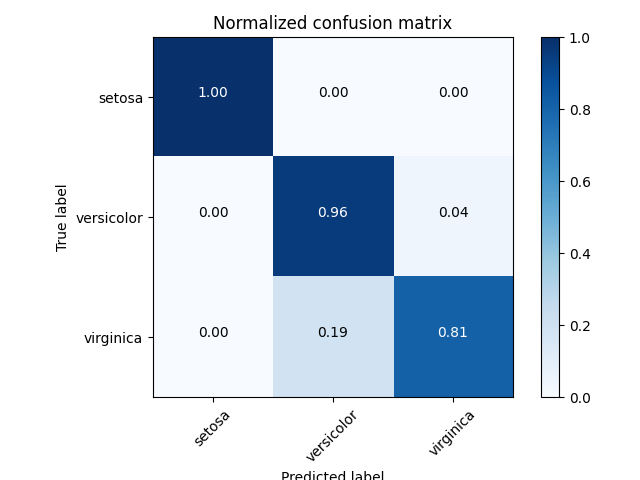

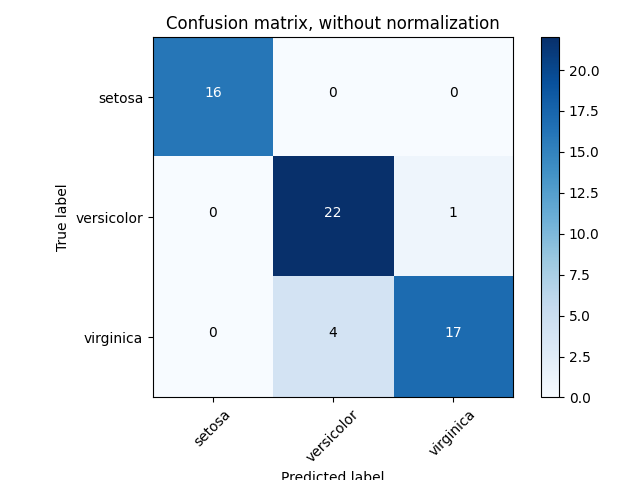

In [76]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMat, classes=iris.target_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMat, classes=iris.target_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

# Part 5 - Hyperparameter Tuning

The goal of this section is to start practicing how to set up a pipeline to tune and test an ML model.

## Coding Requirements

The coding portion is flexible - the goal is to be able to execute the experiments below for analysis.  It may be a bit frustrating to figure out how to get started, but we are trying to prepare you for the final project by having you spend time first planning and studying the APIs. You should keep these requirements in mind:

* Make your code reusable and not overly dependent on a particular dataset. For example, don't rely on hardcoding your datasets names and labels.  Write code that can work for any data set that's formatted properly. 
* Functions should be modular and short. Break your major steps into functions, and be sure to comment your code so it is easy to follow.
* Keep your code simple and easy to read. Let scikit-learn do most of the heavy lifting. Most of your time will be spent reading the documentation and finding the appropriate methods to call. 

SciKit-Learn is very well documented; in most cases, a google search for something like 'sklearn [method]' will direct you to their pages.  However, you should also familiarize yourself with their documentation pages directly.

There are two different styles of documentation provided, and they are complementary:

* [SciKit-Learn User's Guide](https://scikit-learn.org/stable/user_guide.html)
* [SciKit-Learn API Reference](https://scikit-learn.org/stable/modules/classes.html)

The User's Guide gives explanations (with references), and provides cut-and-paste examples of how to use the various different methods the library provides; it's almost textbook-like in the way it's written and organized.  It's the best place to start looking if you're not sure exactly what classes/methods you want to use, since it's organized by ML technique, making it easy to find what you're looking for.

The API Reference, on the other hand, provides detailed specifications for each of the classes and methods available, listing all the different parameters, including what values are available, what they do, what defaults will be used if nothing is specified, etc..

Note that the User's Guide and the API tend to have links to each other; i.e. the API page tends to have a link to the user's guide at the top, and in the user's guide most class/method names are links that, if clicked, will take you to the corresponding page in the API reference.


***
## Part 5a: Full ML Pipeline for RandomForests

Below you will run Random Forests and compare which hyperparameter values do better in terms of estimated generalization error.

### Coding Details

The design of the solution is largely up to you.  To start, we are _requiring_ two functions:

* `run_pipeline` - the initial interface.  This method loads and parses the data and sets up the classifier(s).  It then runs the tune/test pipeline (below).
* `runTuneTest` - runs a train/tune/test pipeline on a given data set and classifier

You will _likely want_ some helper functions as well, but their design and naming is up to you.  

### Implement `run_pipeline()` and `run_tunetest()`

1. `run_pipeline should should load the data set specified in the parameter.  This will be the only part of your code that will be data-set specific - you will need to do something for some datasets (e.g., normalize, convert categorical variables to numeric, etc.) that you do not need to do for others (e.g., the iris dataset can be used as-is).  The goal should be to load the data in the same format for later analysis so that you won't need to know the name of the data set after this point.  **At a minimum, you should support the Breast Cancer Data Set and two other datasets from SKlearn of your choice.**

**See https://scikit-learn.org/stable/datasets.html for what data is available built-in to scikit learn and how to use it.**  As an optional extension, you can try finding other datasets and see what's needed to get them to work with your code.

Running on the cancer data set might look like:
    ```
    run_pipeline('cancer')
    ```

2. Once the data set is loaded, you will run that data set through the analysis pipeline using Random Forests using the `runTuneTest()` method **which you will define below (don't worry about it until you get the basic data-loading working).**
    * Your [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier should fix the number of trees at 200, but **tune the number of features** using the range $1\%, 10\%, 50\%, 100\%, \sqrt{F}$ (square-root of the number of features in the dataset). Note the interface; if passed integers, it will assume they are absolute numbers of features, while if passed floating point numbers it will assume they are fractions of the features to use.
    
3. Add a second classifier of your choice to `run_pipeline()` so that the method now tunes and then compares the scores for two different classifiers
    
4. Lastly, you will write code to report your results.  At a minimum, print the paired test accuracies for all 5 folds for both classifiers. You may want to add more for your analysis in Part B.

NOTE: This is a high-level function; you will need to return to it and add capabilities as you define more methods below.  Be sure you keep this short and rely on other methods to implement the details.


In [77]:
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, load_iris
from sklearn import preprocessing

In [78]:
"""
loads and parses dataset and sets up classifiers before calling runTuneTest

PARAMETERS
   dataSetName - string indicate name of dataset to import and test
   
RETURNS
   rf_accArr - array of accuracy scores from random forest classifier
   sgd_accArr - array of accuracy scores from sgd classifier
"""
def runPipeline(dataSetName):

    # load data
    ds = loadDataSet(dataSetName)
    if ds == False:
        return
    
    print()
    print(f"runPipeline({dataSetName}) \n")

    # process and save data
    X = ds[0]
    y = ds[1]
        
    print("Running 5-fold CV on RF")
    print("-----------------------")
    
    # run random forests classifier 
    rf = ensemble.RandomForestClassifier(n_estimators=200)
    params = {'max_features':[None, 'sqrt', 'log2', 5, 10, 20],'n_estimators':[100, 200, 300]}
    rf_accArr = runTuneTest(rf, params, X, y)
    
    print("Running 5-fold CV on SGD")
    print("------------------------")

    # run sgd classifier 
    sgd = SGDClassifier(loss='log_loss', max_iter=100,shuffle=False, tol=None, \
                        penalty='none', learning_rate='constant', eta0 = 0.1)
    params = {'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                 'loss': ['hinge','log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error']}
    sgd_accArr = runTuneTest(sgd, params, X, y)
    
    # report results
    report(dataSetName, rf_accArr, sgd_accArr)
    
    return [rf_accArr, sgd_accArr]

In [79]:
"""
load data set

PARAMETERS
   dataSetName - string indicating name of data set

RETURN
   data set if valid name
   FALSE if invalid name
"""
def loadDataSet(dataSetName):
    if dataSetName == "cancer":
        X, y = load_breast_cancer(return_X_y=True)
    elif dataSetName == "wine":
        X, y = load_breast_cancer(return_X_y=True)
    elif dataSetName == "mnist":
        X, y = load_breast_cancer(return_X_y=True)
    elif dataSetName == "iris":
        X, y = load_iris(return_X_y=True)
    else:
        print("Invalid data set, use one of the following data sets:")
        print("\tcancer - Wisconsin Breast Cancer data set")
        print("\twine - Wine Recognition data set")
        print("\tmnist - Optical Recognition of Handwritten Digits data set")
        print("\tiris - Iris data set")
        return False
    
    return [X, y]

"""
print accuracy report

PARAMTERS
   ds - name of dataset
   rf - array of accuracy scores from random forest
   knn - array of accuracy scores from sgd
"""
def report(ds, rf, sgd):
    print(ds, "Results")
    print("------------")
    print("Fold    RF        SGD")
    
    for i in range(5):
        print("%d       %.3f      %.3f" % (i+1, rf[i], sgd[i]))
        
    print("RF Mean Accuracy: %.3f" % np.mean(rf))
    print("SGD Mean Accuracy: %.3f" % np.mean(sgd))

In [80]:
#runPipeline("cancer")
#runPipeline("wine")
#runPipeline("mnist")
#runPipeline("iris")
#runPipeline("other")

### Implement `runTuneTest()`

Write a method `runTuneTest` that takes in a base learner object that obeys the SKLearn API conventions (e.g., `SGDClassifier`, `RandomForestClassifier`, etc.), a dictionary of hyperparameters to tune,  and all of the data. This method will then handle creating train/tune/test sets and then performing end-to-end training and evaluation. For example, we could create a $k$-Nearest Neighbor classifier for analysis as follows:

```
    clf = KNeighborsClassifier()
    parameters = {"weights":["uniform","distance"], "n_neighbors":[1,5,11]}
    results = runTuneTest(clf, parameters, X,y)
```
    
  Note that the hyperparameter names match the API for `KNeighborsClassifier`. `parameters` is a dictionary that mapes the (string) name of the hyperparameter to a list of values to try for that hyperparameter.  `runTuneTest` follows this sequence of steps:

1. Divide the data into training/test splits using [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html). **Follow [this example](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold) to create a for-loop** that lets you specify operations for each fold. Set the parameters to **shuffle** the data and use **5 folds** for validation. Set the `random_state` to a fixed integer value (e.g., 42) so the folds are consistent for both algorithms.
1. For each fold, tune the hyperparameters using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), which is a wrapper for your base learning algorithms; it automates the search over multiple hyperparameters. Set the function to use **3 folds** for tuning.
1. After creating a `GridSearchCV` classifier, Call `fit` to train the model using your training data.
1. Get the test-set accuracy by running the `GridSearchCV.score()` method taking in the fold's test data.
1. Return a list of accuracy scores for each fold for analysis.


Code incrementally, and be sure to examine the results of your tuning (what were the best hyperparameter settings? What were the scores across each parameter?) to ensure you have the pipeline correct. You can print out the best parameters using some of the attributes of the `GridSearchCV` classifier such as `best_params_`and the tuning-set score on that set of parameters using `best_score_`.  See the documentation to access other information such as retrieving all scores for all parameters tested, or retrieving the weights for the best tuned model.


In [81]:
"""
tunes classifier to find best paramters and gets accuracy 
scores for each fold

PARAMETERS
  learner - base learner object 
  parameters - a dictionary of hyperparameters to tune
  X - data and features
  y - labels of data

RETURNS
  accArr - array of accuracy scores for each fold
"""
def runTuneTest(learner, parameters, X,y):
    accArr = []
    
    # divide train/test splits
    skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
    
    # tune hyperparameters for each fold
    fcount = 1
    for train, test in skf.split(X,y): 
        
        print("Fold %d:" % fcount)
        fcount += 1
        
        clf = GridSearchCV(learner, parameters, cv=3)
        clf.fit(X[train], y[train])
            
        print("Best Parameters: ", clf.best_params_)
       
        score = clf.score(X[test], y[test])
        accArr.append(score)
        
        print("Tuning Set Score: %.3f \n" % score)
    
    return accArr

In [82]:
#runPipeline("cancer")
#runPipeline("wine")
#runPipeline("mnist")
#runPipeline("iris")

### Tests and sample output

Since the analysis below is dependent on your results, we cannot provide sample output for all possible classifiers and datasets.  But here is what you might get for the breast cancer data set when comparing Random Forests and SVMs (your results may vary slightly; this was the result if you hard code `random_state=42` for the splitting/grid search methods):

```
run_pipeline('cancer')

RUNNING 5-Fold CV on SVMs
------------------------
Fold 1:
Best parameters: {'C': 100, 'gamma': 0.0001}
Tuning Set Score: 0.947

Fold 2:
Best parameters: {'C': 100, 'gamma': 0.0001}
Tuning Set Score: 0.936

... (not all folds are shown in this output)

RUNNING 5-Fold CV on Random Forests
-----------------------------------
Fold 1:
Best parameters: {'max_features': 5}
Tuning Set Score: 0.963

Fold 2:
Best parameters: {'max_features': 3}
Tuning Set Score: 0.965

... (not all folds are shown in this output)

Test set results
-----------------

Fold, SVM, RF
0, 0.912, 0.965
1, 0.930, 0.956
2, 0.930, 0.947
3, 0.939, 0.947
4, 0.965, 0.965
```

**Only the last few lines are required to print.**  But it useful to output other information to understand what choices the grid search makes and for the analysis below.

## Part 5b: Analysis

Analyze your results. This is more open-ended to prepare you for the final project, so it is up to you to explore the data and results, but it should be several paragraphs. **Tell us what you find interesting about the results.** At a minimum, your submission should run on **two datasets besides Breastcancer**, and should compare at least **two different classifiers**.  Include the following types of analysis:

 * Provide **quantitative results**. Present the results visually both in summary and detail (e.g., a [table](https://www.markdownguide.org/cheat-sheet#extended-syntax) using markdown format).  Here is an example of how to create a basic table in markdown:
 
    | A | B | C |
    |---|---|---|
    | 1 | 5 | 7 |
    | 2 | 9 | 3 |
 
 * **Qualitatively assess** the results. What can we conclude/infer about both methods and how did the methods compare to each other? You can use accuracy, confusion matricies, or _hypothesis testing_ (this is optional, but more robust and a very useful concept to understand).  Refer to Section 5.7 of the CIML text book for details.  You can use the [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) to calculate a paired test (e.g. [Wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)) and see if there is a _statistically signifcant_ difference in accuracies:

    ```
    w, p = scipy.stats.wilcoxon(methodAResults, methodBResults)
    print("P-value is: ", p)
    ```
 * Align the results with class discussion e.g., Did one method do better across both data sets, or did they split across the data sets? Can you explain this using properties for each algorithm as discussed in class? What, if any, hyperparameters were commonly chosen for each dataset?

Your analysis should be written as if it were the results section of a scientific report/paper. 

In [83]:
#Optional: if you want to run code for your analysis, this is a place you could put it\

results = runPipeline("wine")

methodAResults = results[0]
methodBResults = results[1]

w, p = scipy.stats.wilcoxon(methodAResults, methodBResults)
print("\nP-value is: ", p)


runPipeline(wine) 

Running 5-fold CV on RF
-----------------------
Fold 1:
Best Parameters:  {'max_features': 10, 'n_estimators': 100}
Tuning Set Score: 0.965 

Fold 2:


KeyboardInterrupt: 

### MNIST Data Set 


| Classifier | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Mean Accuracy |
|------------|--------|--------|--------|--------|--------|---------------|
|RF | 0.965 | 0.921 | 0.947 | 0.974 | 0.965 | 0.958 |
| SGD | 0.886 | 0.904 | 0.895 | 0.956 | 0.965 | 0.921 |

Each call to RF had varied results when it came to tuning the hyperparamters themselves, but the mean accuracy for each fold remained consistently high at 0.954 with each fold scoring consistently above 0.92 for each run. The max_features hyperparameter was usually optimized at 'sqrt' though some preference was also given to 5 for this particular data set. The n_estimators hyperparameter was varied with some preference given to 200 which makes sense as the middle ground is likely to work for a wide variety of shuffled data points. Each call to the SGD classifier had more varied results, though an 'optimal' learning rate was consistently favored. The mean accuracy generally stayed around 0.9, but the difference between the two classifiers is not statistically significant, as suggested by the low p-value of 0.068. Generally, RF makes sense as a better fit because training an ensemble of trees to get the average prediction of the individual classifiers will allow for better generalization when the classifier is presented with a novel query. The multiple sources of randomness when incorporating RF into a K-Fold model further decreases variance, which helps offset the tendency of a decision tree classifier to overfit.

### Wine Recognition Data Set

| Classifier | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Mean Accuracy |
|------------|--------|--------|--------|--------|--------|---------------|
| RF | 0.974 | 0.939 | 0.974 | 0.956 | 0.973 | 0.963 |
| SGD | 0.886 | 0.904 | 0.842 | 0.947 | 0.947 | 0.905 |


Each call to RF on this data set had more consisent results for tuning each hyperparameter, with max_features usually being set to 10 and n_estimators being 200 or 300. This suggests that the wine recognition data set has a higher bias and lower variance compared to the MNIST data set since broader assumptions about the data creates pretty good splits across the board even when the training data is varied. This seems generally true for the SGD classifier as well, with a clear preference for a hinge loss function and optimal learning rate, though invscaling did come up as being a best learning_rate a few times. Though the RF classifier has marginally better performance, a low p-value of 0.0625 suggests that this difference is not statistically significant. I am surprised that SGD has a better performance on the MNIST data set than the Wine Recognition data set because I'd assume lower variance would mean that feature weights could be more consistent, but the MNIST data set does have more examples, so I think that is a contributing factor in ensuring that the model generated from the training data is better at generalizing over the testing data.

***
## Part 6A: Validation Curves

In this part, you will focus on generating validation curves to visualize the impact of the hyperparameters on the model. This is a useful technique for analyzing machine learning models and datasets.  You will generate the curves for at least two classifiers, one of which must be Random Forests.

**Note that the examples in the notebook `plot_curves.ipynb` show much of what you need here**



### Coding requirements

* Follow the same guidelines for loading the data as in Part 1 (support at least MNIST and 20 Newsgroup).  If you wrote your code above in a modular fashion, you should be able to reuse it for this part as well.
* For Random Forests, you will generate a curve for the number of trees (i.e., `n_estimators`). Try all values from 1 to 201 spaced by 10 (i.e., 1, 11, 21, ..., 201). Keep all other hyperparameters at their default values.
* For other classifiers, you'll need to come up with appropriate values.  For instance, if using Support Vector Machines with an RBF kernel, you might range over gamma values $10^{-4},10^{-3},10^{-2},10^{-1},1$.
* To generate the data for the curve, you need the [`validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve) method, which returns the training and test set accuracies for each parameter and each fold. Use 3-fold cross validation in the parameters; this will return to three estimates for each setting to provide a more robust estimate without taking an excessive amount of time.
*  Print the following for each parameter value: the parameter value, the average train accuracy across the three folds, and the average test accuracy across the three folds. 
* Plot the data using [`matplotlib`](https://matplotlib.org/stable/users/index.html) (see this [basic tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) to get started with matplotlib).  The image should include a title (name of the algorithm), axis labels (the hyperparameter on the x-axis and accuracy on the y), a legend, and a different color for the training accuracy and testing accuracy. For SVM's gamma parameter, use a log plot using `semilogx` as in [this example](https://www.statology.org/matplotlib-log-plot/).  See the example output below.


Here is the result if we run `KNeighborsClassifier` with all odd $k$ values from 1 to 21 (this is not your task, you are doing SVMs and Random Forests, but your output should be similarly formatted):

```
>> generateCurve('mnist', 'KNN')

Neighbors, Train Accuracy, Test Accuracy
1, 1.000, 0.853
3, 0.925, 0.853
5, 0.910, 0.851
7, 0.884, 0.843
9, 0.871, 0.841
11, 0.864, 0.830
13, 0.849, 0.812
15, 0.845, 0.812
17, 0.834, 0.807
19, 0.826, 0.802
21, 0.815, 0.788
```

![Plot](KNN-curve.png)

This example image is also provided in your repository as the file `KNN-curve.png`.

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

In [ ]:
"""
generating validation curves to visualize the impact of 
hyperparameters on given model

PARAMETERS
   dataSetName - string representing name of dataset
   method - string representing model to visualize
"""
def generateCurves(dataSetName, method):

    # load data set 
    ds = loadDataSet(dataSetName)
    if ds == False:
        return
    
    X = ds[0]
    y = ds[1]

    if method == "SVM":
        
        # create classifiers and generate data
        svm = SVC()
        kRange = np.array([0.0001, 0.001, 0.01, 0.1, 1])
        strArr = ["SVM", "Gamma"]
        trainAcc, testAcc = validation_curve(svm, X, y, param_name="gamma", param_range=kRange, cv=3, n_jobs=3)
        
        # visualize results
        visualizeCurve(strArr, svm, ds, kRange, trainAcc, testAcc)
    elif method == "RF":
        # create classifier and generate data
        rf = ensemble.RandomForestClassifier(n_estimators=200)
        kRange = np.arange(1,201,10).astype('int')
        strArr = ["RF", "Trees"]
        trainAcc, testAcc = validation_curve(rf, X, y, param_name="n_estimators", param_range=kRange, cv=3, n_jobs=3)
        
        # visualize results
        visualizeCurve(strArr, rf, ds, kRange, trainAcc, testAcc)
    else:
        print("Invalid method, use one of the following methods:")
        print("\tSVM - Support Vector Machines")
        print("\tRF - Random Forest Classifier")
        
    return

In [ ]:
"""
visualizes validation curve

PARAMETERS
   strings - array of method specific strings
   clf - classifier
   kRange - range of hyperparameter values
   xAxis - hyperparamter being tuned
"""
def visualizeCurve(strings, clf, ds, kRange, trainAcc, testAcc):

    # generate data for validation curves
    mean_trainAcc = np.mean(trainAcc, axis=1)
    mean_testAcc = np.mean(testAcc, axis=1)
    
    # print results
    print(strings[0])
    print(strings[1], ", Train Accuracy, Test Accuracy")
    print("--------------------------------------------")
    for i in range(len(kRange)):
        print(kRange[i], "   %.3f   %.3f" % (mean_trainAcc[i], mean_testAcc[i]))
    
    print("\nMean Train Accuracy: %.3f" % np.mean(mean_trainAcc))
    print("Mean Test Accuracy: %.3f" % np.mean(mean_testAcc))
        
    # generate curve
    fig, ax = plt.subplots()
    ax.plot(kRange, mean_trainAcc, label="Training Score", color="darkorange")
    ax.plot(kRange, mean_testAcc, label="Testing Score", color="navy")
    
    plt.title(strings[0])
    plt.xlabel(strings[1])
    plt.ylabel("Accuracy")
    plt.ylim(0.0, 1.1)
    plt.xticks(kRange)
    
    if strings[0] == "SVM":
        plt.semilogx()
    
    plt.legend(loc="best")
    plt.show()

In [ ]:
#write test code here
generateCurves("cancer","SVM")
generateCurves("cancer","RF")

## Part 6B: Analysis

Analyse your results for Part 2A. At a minimum, you should have:

* A validation curve for each data set (cancer, etc.) and each method (Random Forests, etc.).  Each curve should have both the training and test accuracy, clearly labeled axes, and a legend. If appropriate, consider plotting your x-axis in log space to evenly space the points.

* Analyze each of your curves. Your discussion should describe the results and relate it to relevant course topics such as bias/variance as well as overfitting/underfitting.  

* What else do you find interesting?  For example, are some classifiers more robust or more sensitive to variation in the hyperparameter setting?

Intersperse code and analysis below so that your figures show up with your analysis.  You will want to have multiple code/text blocks (it is up to you if you want to have 4 pairs of code/discussion blocks or to group them by e.g., data set or method)

In [ ]:
generateCurves("mnist","SVM")
generateCurves("mnist","RF")

generateCurves("iris","SVM")
generateCurves("iris","RF")

### MNIST Data Set

| Gamma | Train Accuracy | Test Accuracy | 
|-------|----------------|---------------|
| $10^{-4}$ | 0.952 | 0.931 |
| $10^{-3}$ | 0.978 | 0.921 |
| $10^{-2}$ | 1.000 | 0.626 |
| $10^{-1}$ | 1.000 | 0.627 |
| 1.0 | 1.000 | 0.627 |

**Mean Train Accuracy:** 0.986

**Mean Test Accuracy:** 0.747

From the data table above, we can see that as the value of gammma ($\gamma$) gets higher, the accuracy of the SVM classifier on the training set gets higher, but the accuracy on the testing set gets lower, indicating overfitting. Conversely, as the value of $\gamma$ gets lower, the opposite is true, suggesting that a lower $\gamma$ value is better for generalization when using an SVM classifier on the MNIST data set.

| Trees | Train Accuracy | Test Accuracy |
|-------|----------------|---------------|
| 1 | 0.967 | 0.891 |
| 11 | 0.996 | 0.951 |
| 21 | 1.000 | 0.961 |
| 31 | 0.999 | 0.956 |
| 41 | 1.000 | 0.951 |
| 51 | 0.998 | 0.960 |
| 61 | 1.000 | 0.953 |
| 71 | 1.000 | 0.958 |
| 81 | 1.000 | 0.951 |
| 91 | 1.000 | 0.956 |
| 101 | 1.000 | 0.960 |
| 111 | 1.000 | 0.961 |
| 121 | 1.000 | 0.956 |
| 131 | 1.000 | 0.958 |
| 141 | 1.000 | 0.961 |
| 151 | 1.000 | 0.958 |
| 161 | 1.000 | 0.960 |
| 171 | 1.000 | 0.958 |
| 181 | 1.000 | 0.958 |
| 191 | 1.000 | 0.954 |

**Mean Train Accuracy:** 0.998

**Mean Test Accuracy:** 0.954

From the data table above, we can see that as the number of trees gets greater, the accuracy of the RF classifier on the training and testing sets both get higher, suggesting that the by training an ensemble of decision trees, errors in over or underfitting have a better chance of cancelling out and averaging to a generally good prediction because it is able to reduce variance in combining a diversity of trees. The remaining error is likely due to an increase in bias because, as discussed in class, an decrease in variance is likely to lead to an increase in bias and vice versa. Because the mean train accuracy is higher than the mean test accuracy, we can see a slight tendency to overfit, that it seems marginal. 


### Iris Data Set
| Gamma | Train Accuracy | Test Accuracy | 
|-------|----------------|---------------|
| $10^{-4}$ | 0.340 | 0.320 |
| $10^{-3}$ | 0.533 | 0.520 |
| $10^{-2}$ | 1.940 | 0.940 |
| $10^{-1}$ | 1.977 | 0.967 |
| 1.0 | 1.987 | 0.967 |

**Mean Train Accuracy:** 0.755

**Mean Test Accuracy:** 0.743

From the data table above, we can see that as the value of gammma ($\gamma$) gets higher, the accuracy of the SVM classifier on the training and testing sets gets higher, suggesting that the iris data set can be generalized to perform better because we can give a lot of weight to a single example and get good results for classification. We see that the SVM classifier averages about a 75% accuracy rate, so the SVM model cannot be entirely trusted for classifying irises.

| Trees | Train Accuracy | Test Accuracy |
|-------|----------------|---------------|
| 1 | 0.973 | 0.920
| 11 | 0.990 | 0.960
| 21 | 0.993 | 0.953
| 31 | 1.000 | 0.960
| 41 | 1.000 | 0.953
| 51 | 1.000 | 0.967
| 61 | 1.000 | 0.967
| 71 | 1.000 | 0.960
| 81 | 1.000 | 0.960
| 91 | 1.000 | 0.960
| 101 | 1.000 | 0.967
| 111 | 1.000 | 0.967
| 121 | 1.000 | 0.953
| 131 | 1.000 | 0.967
| 141 | 1.000 | 0.960
| 151 | 1.000 | 0.960
| 161 | 1.000 | 0.967
| 171 | 1.000 | 0.960
| 181 | 1.000 | 0.967
| 191 | 1.000 | 0.960

**Mean Train Accuracy:** 0.998

**Mean Test Accuracy:** 0.959

From the data table above, we can see that as the number of trees gets greater, the accuracy of the RF classifier on the training and testing sets both get higher, though that is not consistently true because at 151 trees, the classifier shows a decrease in test accuracy, though teh train accuracy remains high. This shows a tendency for overfitting the training data, though the marginal difference in the mean train accuracy and mean test accuracy suggests that it is not statistically significant for this particular data set. This classifier performs significantly better than the SVM classifier, so there must be some iris that has similar features to another iris such that placing more weight on one sample gives good generalized classifications, but fails to account for the features that RF is able to average out and take into consideration.

### Conclusion
It is clear from both data sets that the RF classifier performs better because the ensemble method with multiple sources of randomness is more robust and allows for better generalization. I found it interesting that the mean train accuracy for both data sets in the 5-fold CV on RF is 0.998 and the mean test accuracy is off by only 0.005, again exemplifying how powerful RF when it comes to generalization.

## Submission

Ensure your code above is:
* Modular and following top-design principles.
* Well-documented, with a top-level function comments describing purprose/parameters/return values and line-comments to explain major steps.
* Cleaned-up: all `TODO`s, `pass` statements should be completed and removed.  Remove debugging prints/commented out code that is no longer needed.
* Well-tested.  Be sure it works on several different data sets.

For your analysis:
* Writing should be clear, concise, and good English
* Plots should have (legible and meaningful). titles, keys, and labels on axes.
* It should always be clear what text is talking about what data/visualization (i.e. in your paragraphs, be clear about what plot your're referring to).
